# Sheet 1: Finding Similar Items

This Jupyter Notebook requires `numpy` and `pandas`, please install them using `conda` or `pip`.

### Submission

Please submit your group solution via LernraumPlus. You are free to hand solutions in as (scanned) PDFs or Jupyter Notebooks.

<style>
    @media (min-width: 1200px)
.container {
    width: 100%;
}
    </style>

In [4]:
# make sure this cell executes without errors
# imports for numeric processing
import pandas as pd
import numpy as np

# Exercise 1 - Shingling

In [3]:
doc1 = [token for token in "ABRACADABRA"]
doc2 = [token for token in "BRICABRAC"]

doc1, doc2

(['A', 'B', 'R', 'A', 'C', 'A', 'D', 'A', 'B', 'R', 'A'],
 ['B', 'R', 'I', 'C', 'A', 'B', 'R', 'A', 'C'])

In [229]:
# Note: Remove pass-term when writing your own function.
def get_shingles(from_list):
    # Calculate shingles.
    shingles = set()
    for num in range(len(from_list) - 1):
        shingles.add(from_list[num] + from_list[num+1])

    return list(shingles)
    
# 1. How many 2-shingles does ABRACADABRA have?
doc1_shingles = np.array(get_shingles(doc1))

print("1. ", doc1_shingles)

# 2. How many 2-shingles does BRICABRAC have?
doc2_shingles = np.array(get_shingles(doc2))

print("2. ", doc2_shingles)

# 3. How many 2-shingles do they have in common?
in_common = np.unique(np.concatenate((doc1_shingles, doc2_shingles)))
# in_common = doc1_shingles[np.in1d(doc1_shingles, doc2_shingles)]

print("3. ", in_common)

# 4. What is the Jaccard similarity between the two documents?
def jaccard(doc1, doc2):
    #Calculate Jaccard similarity.
    
    doc1_shingles = np.array(get_shingles(doc1))
    doc2_shingles = np.array(get_shingles(doc2))

    in_common = doc1_shingles[np.in1d(doc1_shingles, doc2_shingles)]

    union = np.unique(np.concatenate((doc1_shingles, doc2_shingles)))

    return len(in_common) / len(union)

print("4. ", jaccard(doc1, doc2))

1.  ['RA' 'DA' 'BR' 'AD' 'AB' 'CA' 'AC']
2.  ['RA' 'BR' 'RI' 'IC' 'AB' 'CA' 'AC']
3.  ['AB' 'AC' 'AD' 'BR' 'CA' 'DA' 'IC' 'RA' 'RI']
4.  0.5555555555555556


# Exercise 2 - Minhashing

In [11]:
# the above matrix as a pandas DataFrame
matrix1 = pd.DataFrame([[0, 1, 1, 0],
                        [1, 0, 1, 1],
                        [0, 1, 0, 1],
                        [0, 0, 1, 0],
                        [1, 0, 1, 0],
                        [0, 1, 0, 0] ], columns=["C1", "C2", "C3", "C4"])

# permutation vectors as numpy arrays
permutation1 = np.array([4, 5, 0, 2, 3, 1])
permutation2 = np.array([3, 1, 0, 5, 2, 4])

matrix1, permutation1, permutation2

(   C1  C2  C3  C4
 0   0   1   1   0
 1   1   0   1   1
 2   0   1   0   1
 3   0   0   1   0
 4   1   0   1   0
 5   0   1   0   0, array([4, 5, 0, 2, 3, 1]), array([3, 1, 0, 5, 2, 4]))

In [26]:
def minhash(matrix, permutation, silent=True):
    
    mat = matrix.copy()

    # reorder the rows of the given matrix using the row permutation vector
    # print(mat)
    mat = mat.reindex(permutation)
    # print(mat)

    # reset index to restore an ascending 0 > |rows|-1 indexing
    # TODO - UNCOMMENT LINE BELOW
    # mat = mat.sort_index(axis=0, ascending=True)
    mat.reset_index(inplace=True, drop=True)
    print(mat)

    # find the first position of the value 1 in each column (row index)
    # if no 1 exists in the column, we default to NaN (not a number)
    min_hash = np.empty(mat.shape[1])
    min_hash[:] = np.NaN
    for column in range(mat.shape[1]):
        for row in range(mat.shape[0]):
            if mat.iloc[row, column] == 1:

                # TODO - REMOVE ONE FROM THE TWO ASSIGNMENTS BELOW  
                # min_hash[column] = row
                # print(type(mat.iloc[[row], [column]].index)))
                min_hash[column] = mat.iloc[[row], [column]].index.tolist()[0]
                break
    

    # return the minhash vector
    return min_hash

In [27]:
print("Permutation 1")
print("Permutation 1", permutation1, "minhash", minhash(matrix1, permutation1))

Permutation 1
   C1  C2  C3  C4
0   1   0   1   0
1   0   1   0   0
2   0   1   1   0
3   0   1   0   1
4   0   0   1   0
5   1   0   1   1
Permutation 1 [4 5 0 2 3 1] minhash [0. 1. 0. 3.]


In [61]:
print("-" * 40 + "\nPermutation 2")
print("Permutation 2", permutation2, "minhash", minhash(matrix1, permutation2))

----------------------------------------
Permutation 2
C1    1
C2    0
C3    0
C4    1
dtype: int64
Permutation 2 [3 1 0 5 2 4] minhash    C1  C2  C3  C4
0   0   1   1   0
1   1   0   1   1
2   0   1   0   1
3   0   0   1   0
4   1   0   1   0
5   0   1   0   0


## Exercise 3

In [29]:
# the above matrix as a pandas DataFrame
matrix2 = pd.DataFrame([[0, 1, 0, 1],
    [0, 0, 0, 1],
    [1, 1, 0, 0],
    [0, 0, 1, 0],
    [0, 1, 1, 0],
    [1, 0, 0, 0],
    [1, 0, 1, 0]], columns=["S1", "S2", "S3", "S4"])
matrix2

,S1,S2,S3,S4
0,0,1,0,1
1,0,0,0,1
2,1,1,0,0
3,0,0,1,0
4,0,1,1,0
5,1,0,0,0
6,1,0,1,0


In [30]:
# hash function definitions
# note that h1 = lambda x: 2.0 * x + 1.0 % 7.0 would not work in Python because of operator precedence
h1 = lambda x: (2.0 * x + 1.0) % 7.0
h2 = lambda x: (3.0 * x + 2.0) % 7.0
h3 = lambda x: (5.0 * x + 2.0) % 7.0

hash_functions = {'h1': h1, 'h2': h2, 'h3': h3}

In [31]:
# apply these hash functions to matrix2
def apply_hash_to_matrix(matrix, hash_func):
    mat = matrix.copy()

    new_row_names = []
    for num in matrix.index.tolist():

        new_idx = int(hash_func(num)) # calculating index for num'th rows
        mat.loc[num] = matrix.loc[new_idx] # assaigning new row

        new_row_names.append(new_idx) # remember indexes
    
    mat.index = new_row_names

    return mat

print("--- ORIGINAL MATRIX ---\n")
print(matrix2)

print("\n--- HASHED MATRICIES ---\n")
for func in hash_functions.values():
    print(apply_hash_to_matrix(matrix2, func))

--- ORIGINAL MATRIX ---

   S1  S2  S3  S4
0   0   1   0   1
1   0   0   0   1
2   1   1   0   0
3   0   0   1   0
4   0   1   1   0
5   1   0   0   0
6   1   0   1   0

--- HASHED MATRICIES ---

   S1  S2  S3  S4
1   0   0   0   1
3   0   0   1   0
5   1   0   0   0
0   0   1   0   1
2   1   1   0   0
4   0   1   1   0
6   1   0   1   0
   S1  S2  S3  S4
2   1   1   0   0
5   1   0   0   0
1   0   0   0   1
4   0   1   1   0
0   0   1   0   1
3   0   0   1   0
6   1   0   1   0
   S1  S2  S3  S4
2   1   1   0   0
0   0   1   0   1
5   1   0   0   0
3   0   0   1   0
1   0   0   0   1
6   1   0   1   0
4   0   1   1   0


- b) Describe how to check if these hash functions are permutations.

The simplest answer - Pass every value to the function from range <0; 6> and check if values returned don’t repeat. If for every value from the range a function returns a different value it means that a function is a bijection so it’s a permutation.

- c) How close are the estimated Jaccard similarities for the six pairs of columns to the true Jaccard similarities?

In [32]:
# reset hash functions to the original exercise 
h1 = lambda x: (2.0 * x + 1.0) % 7.0
h2 = lambda x: (3.0 * x + 2.0) % 7.0
h3 = lambda x: (5.0 * x + 2.0) % 7.0


hash_functions = {'h1': h1, 'h2': h2, 'h3': h3}

In [34]:
# hint: the following function from the built-in Python library itertools can come in handy here
from itertools import combinations

def get_sets(mat):
    s = []

    for row in mat.as_matrix().T:
        s_temp = []
        for num, el in enumerate(row):
            if el == 1: 
                s_temp.append(num)

        s.append(s_temp)

    return s

def calc_true_jacard(mat):

    s = get_sets(mat)
    s = np.array(s)

    all_combinations = list(combinations(range(mat.shape[1]), 2))

    result = []
    for comb in all_combinations:
        s1 = np.array(s[comb[0]])
        s2 = np.array(s[comb[1]])
        
        in_common = s1[np.in1d(s1, s2)]
        union = np.unique(np.concatenate((s1, s2)))

        result.append((np.array(comb) + 1, len(in_common)/len(union)))

    return result

def calc_min_hash_signature(mat, hash_funcions):
    
    hash_signature = np.full((len(hash_funcions), mat.shape[1]), np.Inf)

    mat_np = mat.to_numpy()

    for idx, row in enumerate(mat_np):

        h_values = [hash_funcions[0](idx), hash_funcions[1](idx), hash_funcions[2](idx)]
        for num_hash in range(len(h_values)):
            for idx_2,val in enumerate(row):
                if val > 0 and h_values[num_hash] < hash_signature[num_hash][idx_2]:
                    hash_signature[num_hash][idx_2] = h_values[num_hash]

    return hash_signature

def calc_min_hash_similarities(mat):

    all_combinations = list(combinations(range(mat.shape[1]), 2))

    result = []
    for comb in all_combinations:
        s1 = np.array(mat.T[comb[0]])
        s2 = np.array(mat.T[comb[1]])

        similar = 0
        all_items = len(s1)

        for num in range(len(s1)):
            if s1[num] == s2[num]:
                similar += 1

        result.append((np.array(comb) + 1, similar/all_items))

    return result


real_sims = calc_true_jacard(matrix2)

min_hash_mat = calc_min_hash_signature(matrix2, [h1, h2, h3])
estimated_sims = calc_min_hash_similarities(min_hash_mat)

print("Real similarity\t Estimated similarity")
for real_sim in real_sims:
    for estimated_sim in estimated_sims:
        # print(real_sim)
        if (real_sim[0] == estimated_sim[0]).all():
            print (real_sim[1], "\t\t", estimated_sim[1])

Real similarity	 Estimated similarity
0.2 		 0.0
0.2 		 0.0
0.0 		 0.0
0.2 		 0.6666666666666666
0.25 		 0.3333333333333333
0.0 		 0.0
ipykernel_launcher:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
ipykernel_launcher:20: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


- d) What is the benefit of using hash functions instead of permutations?

There are two main benefits:
- memory usage - instead of storing whole permutation in memory, we can calculate new position of the row by putting original index into hash function 
- computation time - for large number of rows calculating a permutation may be time-consuming. To get a new index from a hash function, old index just need to be putted into hash function 

# Exercise 4 - LSH

In [133]:
SIG2 = pd.DataFrame([
                [1, 2, 1, 1, 2, 5, 4],
                [2, 3, 4, 2, 3, 2, 2],
                [3, 1, 2, 3, 1, 3, 2],
                [4, 1, 3, 1, 2, 4, 4],
                [5, 2, 5, 1, 1, 5, 1],
                [6, 1, 6, 4, 1, 1, 4]
            ],
            columns=["C1", "C2", "C3", "C4", "C5", "C6", "C7"],
            dtype='int64')
SIG2

,C1,C2,C3,C4,C5,C6,C7
0,1,2,1,1,2,5,4
1,2,3,4,2,3,2,2
2,3,1,2,3,1,3,2
3,4,1,3,1,2,4,4
4,5,2,5,1,1,5,1
5,6,1,6,4,1,1,4


In [134]:
bands = 3
rows_per_band = int(SIG2.shape[0] / bands) # this only works for multiples here
print("bands", bands, "rows/band", rows_per_band)

bands 3 rows/band 2


In [135]:
# hint: the following function from the built-in Python library itertools can come in handy here
from itertools import combinations

In [136]:
my_Sig = SIG2.to_numpy()

band_indices = [x*rows_per_band for x in range(0, bands)]
cols = []
columns = []
for band in band_indices:
    cols = []
    for index in range(0, SIG2.shape[1]):
        col_in_band = []
        for rpb in range(band, band + rows_per_band):
            col_in_band.append(my_Sig[rpb][index])
        cols.append(col_in_band)
    columns.append(cols)
#print(columns)
idx = 1
buckets = []
#print(cols)

buckets = []
for col in columns:
    idx = 1
    bucket = []
    for c in col:
        #bucket = []
        idx1 = 1
        for c1 in col:
            if c == c1:
                if idx != idx1:
                    if(sorted((idx,idx1)) not in bucket):
                        bucket.append(sorted((idx, idx1)))
            idx1+=1
        idx += 1
    buckets.append(bucket)

print(buckets)

[[[1, 4], [2, 5]], [[1, 6]], [[1, 3], [4, 7]]]


# Exercise 5 - Locality-Sensitive Families
**Definitions and assumptions**:

Hash function family $H$: $(d_1,d_2,p_1,p_2)$-sensitive

Probability of any hash function $h \in H$ is $Pr[h(x)=h(y)] = 1-d(x,y)$ (d is distance function, e.g. Jaccard)

*AND* construction of family $H$ -> $H'$:

$h = [h_1, \dots , h_r]$ in $H’$, $h(x)=h(y)$ if and only if $h_i(x)=h_i(y)$ for all $i$

If H is $(d_1,d_2,p_1,p_2)$-sensitive, then H’ is $(d_1,d_2,(p_1)^r,(p_2)^r)$-sensitive. ("**r**ows in a band")

*OR* construction of family $H$ -> $H'$:

$h = [h_1, \dots, h_b]$ in $H’$, $h(x)=h(y)$ if and only if $h_i(x)=h_i(y)$ for some $i$.

If $H$ is $(d_1,d_2,p_1,p_2)$-sensitive, then $H’$ is $(d_1,d_2,1-(1-p_1)^b,1-(1-p_2)^b)$-sensitive.

AND-OR composition: $r$-way AND construction followed by $b$-way OR construction - probability $1-(1-p^r)^b$ (S-curve)

OR-AND composition: $b$-way OR construction followed by an $r$-way AND construction - probability $(1-(1-p)^b)^r$ (S-curve mirrored along both axes)

[source](https://towardsdatascience.com/understanding-locality-sensitive-hashing-49f6d1f6134) 

[[0.002997000999999999], [0.02922944695462726], [0.10268669097859007], [0.23858691024600787], [0.4342710708385934], [0.6609405270899766], [0.8634555147910167], [0.980097489]]


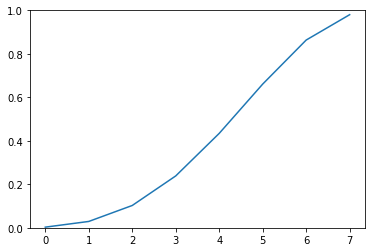

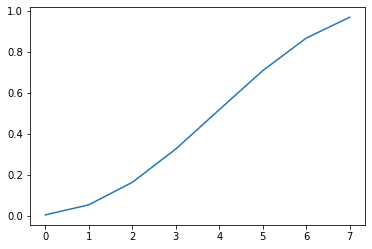

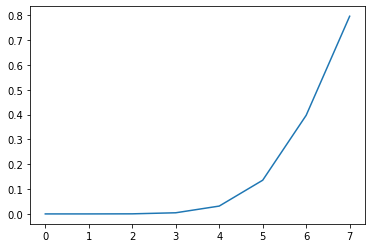

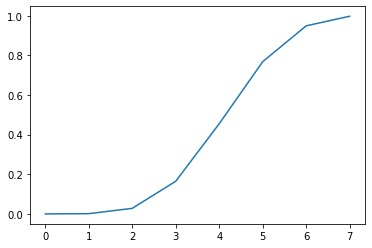

In [138]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#task 1 & 2
r = 2
b = 3

#task 3
param = 2

def and_construction(p, r):
    return pow(p,b)

def or_construction(p, b):
    return 1-pow(1-p, b)

def task_one(p1, p2, r, b):
    result_p1 = and_construction(p1, r)
    result_p1 = or_construction(result_p1, b)
    result_p2 = and_construction(p2, r)
    result_p2 = or_construction(result_p2, b)
    return(result_p1, result_p2)

def task_two(p1 ,p2 , r, b):
    result_p1 = or_construction(p1, b)
    result_p1 = and_construction(result_p1, r)
    result_p2 = or_construction(p2, b)
    result_p2 = and_construction(result_p2, r)
    return(result_p1, result_p2)

def task_3(p1, p2, r, b):
    result_p1 = and_construction(p1, r)
    result_p1 = or_construction(result_p1, b)
    result_p1 = and_construction(result_p1, r)
    result_p2 = and_construction(p2, r)
    result_p2 = or_construction(result_p2, b)
    result_p2 = and_construction(result_p2, r)
    return(result_p1, result_p2)

def task_4(p1, p2, r, b):
    result_p1 = or_construction(p1, b)
    result_p1 = and_construction(result_p1, r)
    result_p1 = or_construction(result_p1, b)
    result_p1 = and_construction(result_p1, r)
    result_p2 = or_construction(p2, b)
    result_p2 = and_construction(result_p2, r)
    result_p2 = or_construction(result_p2, b)
    result_p2 = and_construction(result_p2, r)
    return(result_p1, result_p2)


def main():
    d1 = 0.3
    d2 = 0.6
    p1 = 1 - d1
    p2 = 1 - d2
    task1_list = []
    task2_list = []
    task3_list = []
    task4_list = []
    for p in np.linspace(0.1, 0.9, 8):
        probability = task_one(p, p, 2, 3)
        task1_list.append([probability[0]])
        probability = task_two(p, p, 3, 2)
        task2_list.append([probability[0]])
        probability = task_3(p, p, 2, 2)
        task3_list.append([probability[0]])
        probability = task_4(p, p, 2, 2)
        task4_list.append([probability[0]])
    print(task1_list)
    plt.ylim(0, 1)
    #plt.xlim(0, d1)
    plt.plot(task1_list)
    plt.show()
    plt.plot(task2_list)
    plt.show()
    plt.plot(task3_list)
    plt.show()
    plt.plot(task4_list)
    plt.show()


if __name__ == "__main__":
    main()